In [2]:
import pandas

In [22]:
# Write me code that keep only columns 'userId', 'movieId', 'rating' from the csv file 'notebooks/ratings_train_clean.csv' and saves the result to the same file.
data_path = 'data/ratings_train_clean.csv'
save_path = 'data/only_ratings_train.csv'

# Read the CSV file
df = pandas.read_csv(data_path)

# Keep only the specified columns
df = df[['userId', 'movieId', 'rating', 'timestamp']]

# Save the result back to the same file
df.to_csv(save_path, index=False)

In [3]:
data_path = 'data/only_ratings_train.csv'

## Exploratory Data Analysis

In [4]:
# Load the dataset
df = pandas.read_csv(data_path)

In [7]:
# Display the first few rows
df.head()

,userId,movieId,rating
0,1,2294,2.0
1,1,2455,2.5
2,1,1371,2.5
3,1,2105,4.0
4,2,150,5.0


In [8]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36757 entries, 0 to 36756
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   36757 non-null  int64  
 1   movieId  36757 non-null  int64  
 2   rating   36757 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 861.6 KB


In [5]:
# Basic statistics
df.describe()

,userId,movieId,rating
count,36757.000000,36757.000000,36757.000000
mean,346.239138,5330.848981,3.576421
std,195.097065,14371.278127,1.052036
min,1.000000,2.000000,0.500000
25%,177.000000,494.000000,3.000000
50%,361.000000,1380.000000,4.000000
75%,519.000000,2731.000000,4.000000
max,671.000000,148652.000000,5.000000


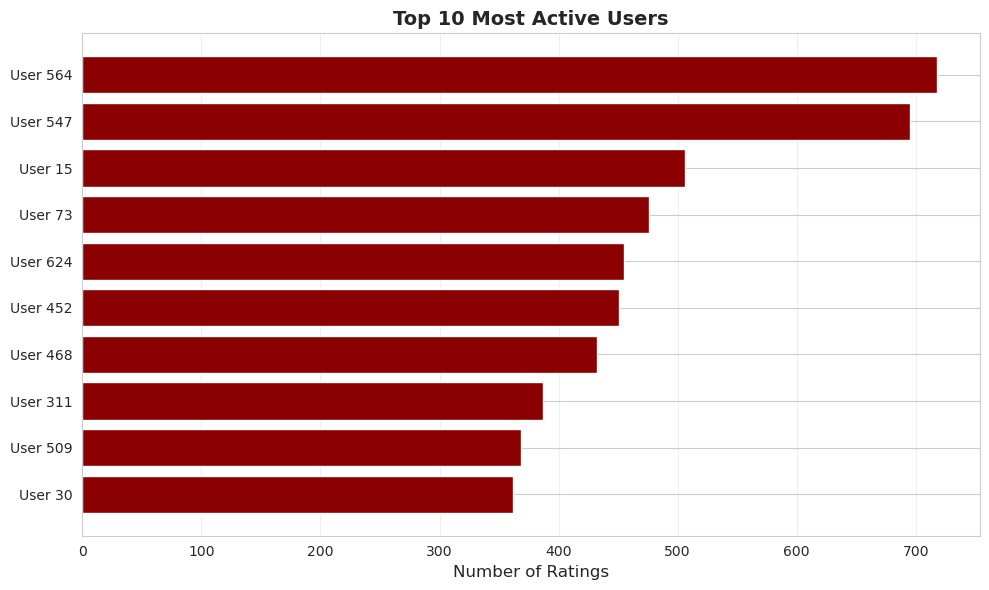

In [18]:
# Top 10 most active users
top_users = ratings_per_user.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_users)), top_users.values, color='darkred')
plt.yticks(range(len(top_users)), [f"User {id}" for id in top_users.index])
plt.xlabel('Number of Ratings', fontsize=12)
plt.title('Top 10 Most Active Users', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

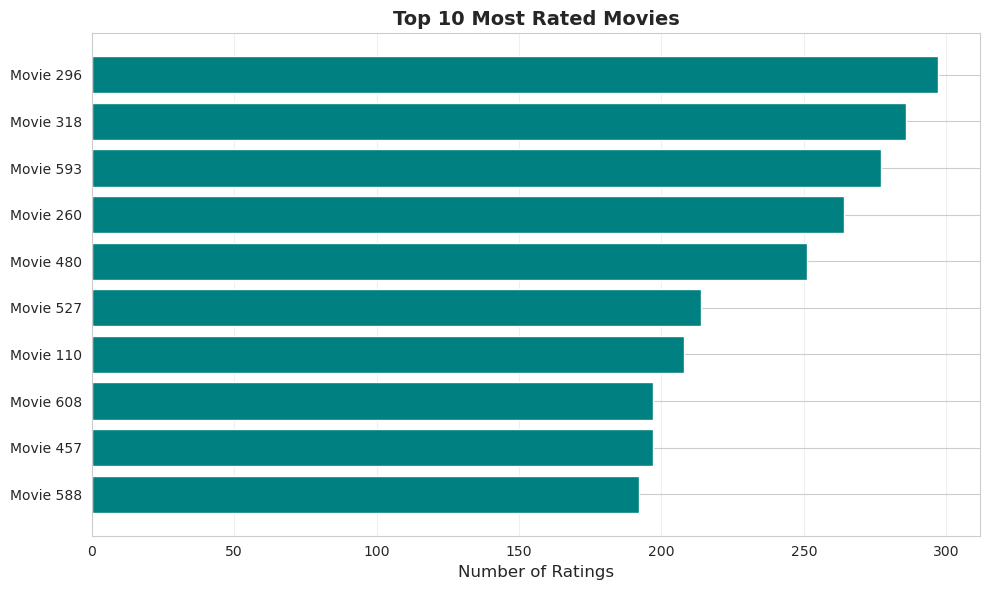

In [17]:
# Top 10 most rated movies
top_movies = ratings_per_movie.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_movies)), top_movies.values, color='teal')
plt.yticks(range(len(top_movies)), [f"Movie {id}" for id in top_movies.index])
plt.xlabel('Number of Ratings', fontsize=12)
plt.title('Top 10 Most Rated Movies', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

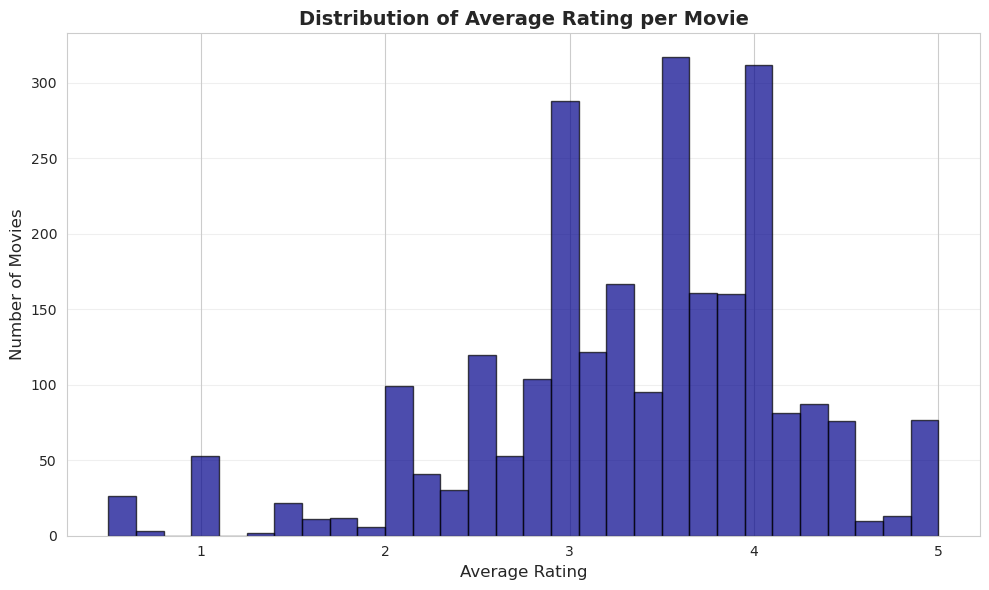

Mean of average movie ratings: 3.34
Std of average movie ratings: 0.85


In [16]:
# Average rating per movie
avg_rating_per_movie = df.groupby('movieId')['rating'].mean()
plt.figure(figsize=(10, 6))
plt.hist(avg_rating_per_movie, bins=30, color='darkblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Rating per Movie', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Mean of average movie ratings: {avg_rating_per_movie.mean():.2f}")
print(f"Std of average movie ratings: {avg_rating_per_movie.std():.2f}")

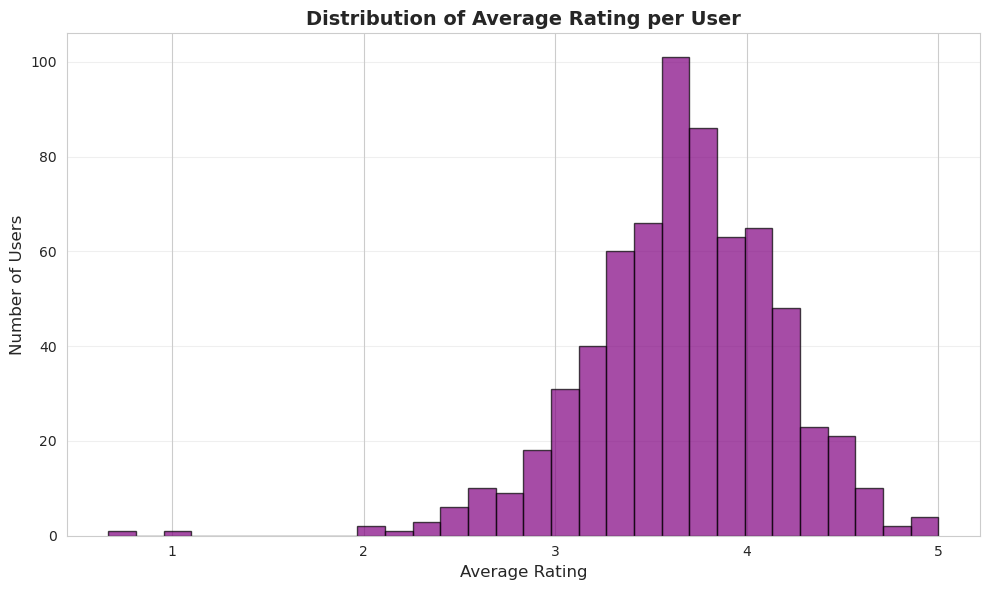

Mean of average user ratings: 3.66
Std of average user ratings: 0.50


In [15]:
# Average rating per user
avg_rating_per_user = df.groupby('userId')['rating'].mean()
plt.figure(figsize=(10, 6))
plt.hist(avg_rating_per_user, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Rating per User', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Mean of average user ratings: {avg_rating_per_user.mean():.2f}")
print(f"Std of average user ratings: {avg_rating_per_user.std():.2f}")

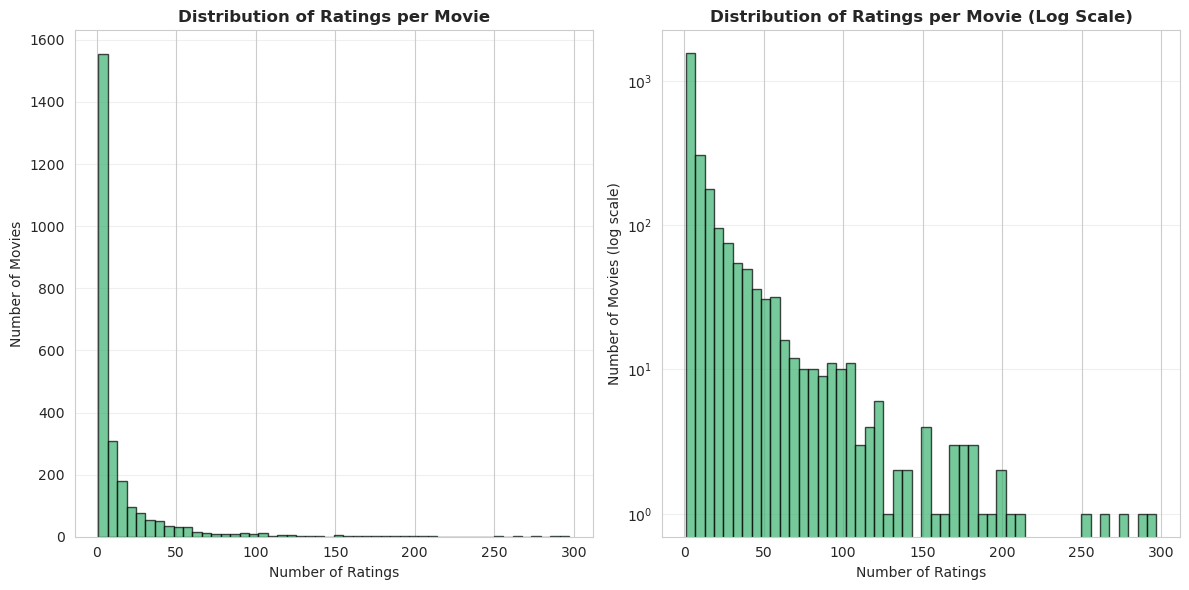

In [14]:
# Ratings per movie distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(ratings_per_movie, bins=50, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings per Movie', fontsize=12, fontweight='bold')
plt.xlabel('Number of Ratings', fontsize=10)
plt.ylabel('Number of Movies', fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(ratings_per_movie, bins=50, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings per Movie (Log Scale)', fontsize=12, fontweight='bold')
plt.xlabel('Number of Ratings', fontsize=10)
plt.ylabel('Number of Movies (log scale)', fontsize=10)
plt.yscale('log')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

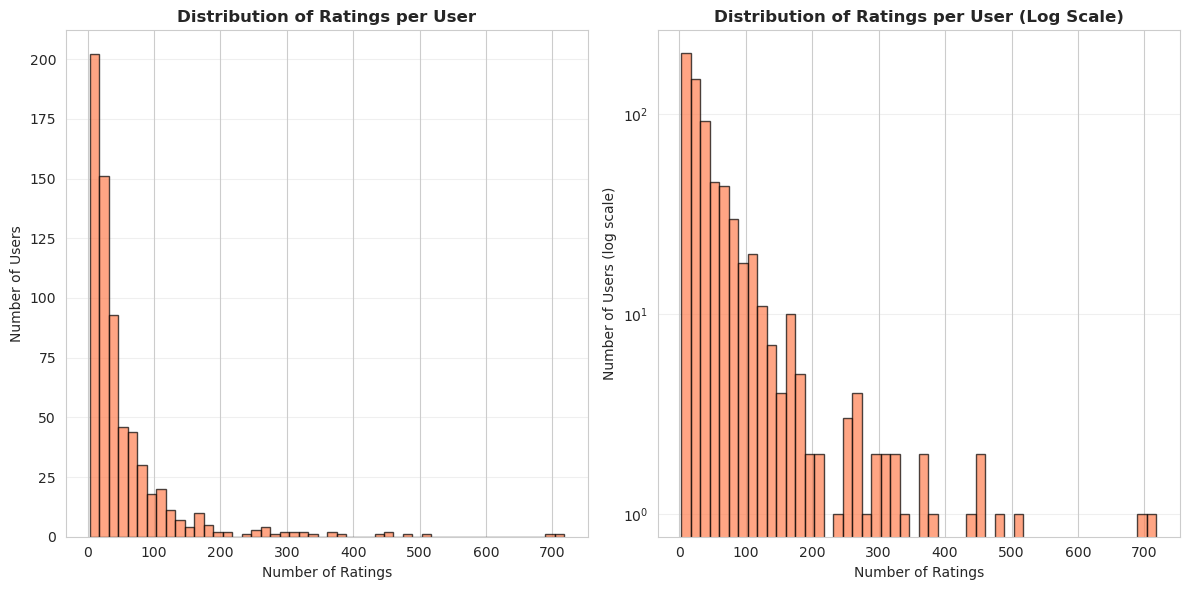

In [13]:
# Ratings per user distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(ratings_per_user, bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings per User', fontsize=12, fontweight='bold')
plt.xlabel('Number of Ratings', fontsize=10)
plt.ylabel('Number of Users', fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(ratings_per_user, bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings per User (Log Scale)', fontsize=12, fontweight='bold')
plt.xlabel('Number of Ratings', fontsize=10)
plt.ylabel('Number of Users (log scale)', fontsize=10)
plt.yscale('log')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

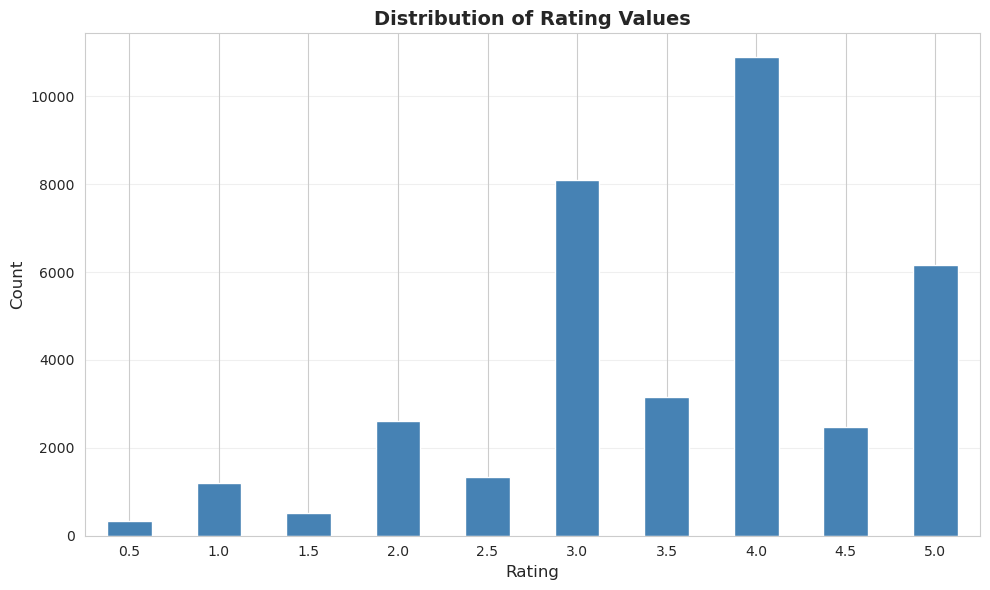

In [12]:
# Rating distribution histogram
plt.figure(figsize=(10, 6))
df['rating'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribution of Rating Values', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Visualizations

In [10]:
# Ratings per movie statistics
ratings_per_movie = df.groupby('movieId').size()
print("Ratings per movie:")
print(ratings_per_movie.describe())
print(f"\nMovies with only 1 rating: {(ratings_per_movie == 1).sum()}")
print(f"Movies with >100 ratings: {(ratings_per_movie > 100).sum()}")

Ratings per movie:
count    2548.000000
mean       14.425824
std        27.940096
min         1.000000
25%         1.000000
50%         4.000000
75%        14.000000
max       297.000000
dtype: float64

Movies with only 1 rating: 674
Movies with >100 ratings: 57


In [9]:
# Ratings per user statistics
ratings_per_user = df.groupby('userId').size()
print("Ratings per user:")
print(ratings_per_user.describe())
print(f"\nUsers with only 1 rating: {(ratings_per_user == 1).sum()}")
print(f"Users with >100 ratings: {(ratings_per_user > 100).sum()}")

Ratings per user:
count    671.000000
mean      54.779434
std       77.112569
min        3.000000
25%       15.000000
50%       28.000000
75%       63.000000
max      718.000000
dtype: float64

Users with only 1 rating: 0
Users with >100 ratings: 89


In [8]:
# Rating distribution
print("Rating value distribution:")
print(df['rating'].value_counts().sort_index())
print(f"\nMean rating: {df['rating'].mean():.2f}")
print(f"Median rating: {df['rating'].median():.2f}")
print(f"Mode rating: {df['rating'].mode()[0]}")

Rating value distribution:
rating
0.5      340
1.0     1192
1.5      528
2.0     2604
2.5     1340
3.0     8085
3.5     3152
4.0    10887
4.5     2467
5.0     6162
Name: count, dtype: int64

Mean rating: 3.58
Median rating: 4.00
Mode rating: 4.0


In [7]:
# Dataset size and unique counts
print(f"Total number of ratings: {len(df):,}")
print(f"Number of unique users: {df['userId'].nunique():,}")
print(f"Number of unique movies: {df['movieId'].nunique():,}")
print(f"Number of unique rating values: {df['rating'].nunique()}")
print(f"\nSparsity: {1 - len(df) / (df['userId'].nunique() * df['movieId'].nunique()):.4%}")

Total number of ratings: 36,757
Number of unique users: 671
Number of unique movies: 2,548
Number of unique rating values: 10

Sparsity: 97.8501%


In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values:
userId     0
movieId    0
rating     0
dtype: int64

Total missing values: 0


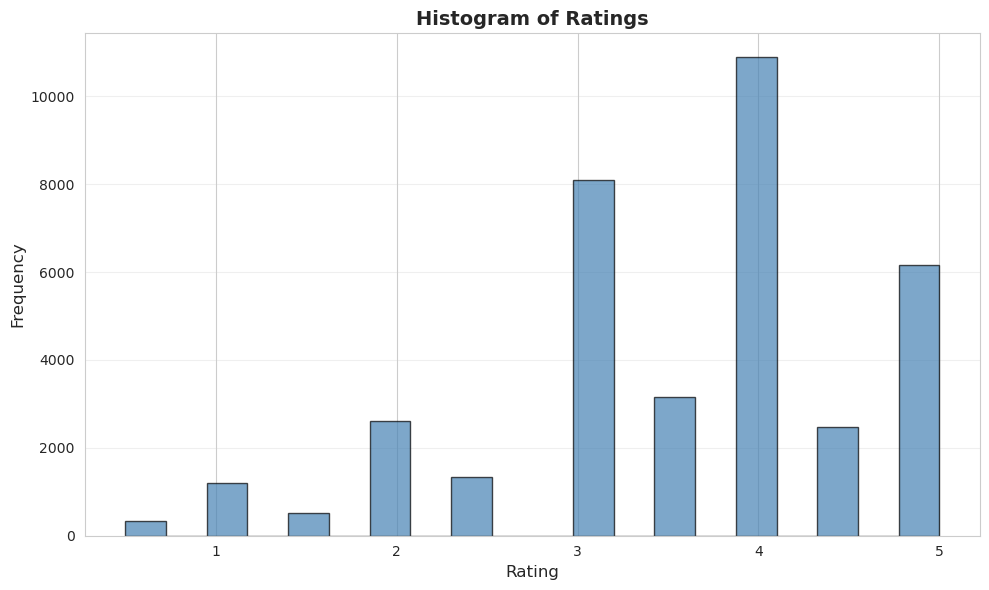

In [19]:
# Plot histogram of ratings
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
# count distinct number of users and movies
num_users = df['userId'].nunique()
num_movies = df['movieId'].nunique()

print(f"Number of distinct users: {num_users:,}")
print(f"Number of distinct movies: {num_movies:,}")

Number of distinct users: 671
Number of distinct movies: 2,548
